# Hvordan kan vi få informasjon fra satelitten når all kommunikasjon er brutt?

I denne Computational Essay skal vi ta for oss et sikkerhets tilfelle får et case scenario. Når vi sender satelitter opp til rommet, ønsker vi oss å holde på kommunikasjon mellom basene som er på jorda, og satelitten som er oppe i banen rundt jorda. Det er spesielt viktig å vite satelittens posisjon og hastighet under banets justeringer, derfor brutt på kommunikasjon kan føre til katastrofale konsekvenser. 

I denne computational essay skal vi derfor fordype oss inn i et system som vi kan bruke i slike scenarior for å unngå katastrofier. 

Vi skal begynne først med et enkel og tilnærmet perfekt system, og deretter skal vi ta for oss de begrensninger av antagelsene og bevege oss inn i mer og mer komplisert system som blir tilnærmet til realiteten. 

### System 1: Et kilde og en observatører i 1D

Vi kan først tenke oss og anta at vi befinner oss i en 1D plan. I denne planen finnes det to objekter. Vi kaller det ene et observatør, og det andre for et kilde. Vi da tenker oss at kilden sender ut lysstråling i alle mulige retninger, og observatøren har et måleaparat som kan observere disse strålene. 

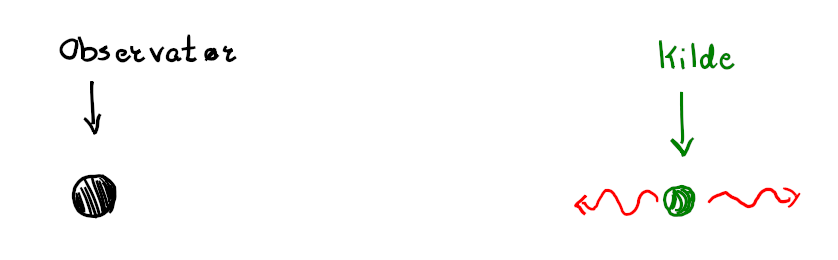

Vi da modellerer et model for denne lysstrålen. Vi antar at denne lysstrålet er på et enkel sinus funksjon av tiden $t$. For nå antar vi at denne kilden stråler ut lys med frekvensen på 5Hz.

$$\text{signal} = A\sin(2\pi ft)$$
A er amplituden til signalet.

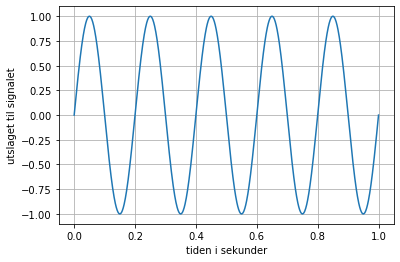

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sinus(t,f):
    return A*np.sin(2*np.pi*f*t)


A = 1
N = 1000 
T = 1 #tar opp signal i 1 sekund
"""
her setter vi N til å være 100, N bestemmer rett og slett hvor presis
vår data blir presentert. Vi kommer mer innpå etterpå hvor høy N
må være ved bruk av Nyquist regel.
"""
t = np.linspace(0,T,N)


plt.plot(t,sinus(t, 5))
plt.xlabel("tiden i sekunder")
plt.ylabel("utslaget til signalet")
plt.grid(True)
plt.show()

Her antokk vi at observatøren tar målingene i 1 sekund. 

Vi kan nå anta at kilden beveger seg relativt til oss. Hva kommer observatøren observere? Ifølge den Austriske fysikeren Christofer Doppler, kommer observatøren til å måle et bølge med høyere frekvens hvis kilden beveger seg mot obsevatøren, og lavere frekvens hvis kilden beveger seg fra obsevatøren.

Dette kan bli illustrert av .gif'en nedenfor.

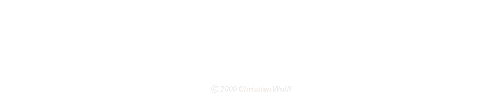

Her kan vi se et bil som sender et konstant frekvens fra hans referanse system, men for oss (som ser dette fra side) ser vi akkurat samme frekvens i alle retningen når bilen står i ro, men med engang bilen begynner å bevege seg mot en retning, ser vi at det blir tettere mellom bølgetopper. Det vil si at jo kortere bølgelenge er, desto større er frekvensen.

Ved å vite frekvensen $f_k$ som er sendt fra kildet, og observert frekvensen $f$, kan vi da finne ut hvor raskt kilden beveger seg relativt til oss!

Relasjonen mellom hastigheten og frekvensene er oppgitt i uttrykk (1)

\begin{equation*}
f_o = \frac{c}{c - v}f_k
\tag{1}
\end{equation*}
Her er $f_o$ frekvensen som observatør observerer, $c$ er strålets hastighet, $v$ er kildets hastighet relativt til observatør, og $f_k$ er frekvensen som kildet sender ut.

For å teste dette ut, antar vi at strålen beveger seg med 100m/s, kildet sender fortsatt ut 5Hz, og at observatøren observerer dette signalet:

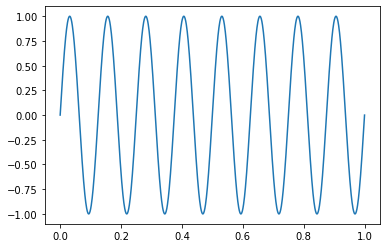

In [2]:
plt.plot(t, sinus(t,8))
plt.show()

Hvordan kan vi bestemme frekvensen utifra dette signalet? 

Hvis vi hadde for eksempel prøvd å multiplisere dette sinus funksjonen med annen sinus funksjon med annen frekvens, ville vi ikke få et stort utslag, men hvis vi multiplsierer dette sinus signalet med identisk sinus signal, ville vi ha fått stort utslag! Dette skal vi ikke teste her nå, men dette er noe som heter for Fourier transform! Vi rett og slett utfører flere slike multiplikasjon og tester ut forskjellige sinus signaler med forskjellige frekvenser, når vi prøver ut et frekvens som er identisk, vil vi få et stort utslag på det frekvensen. Vi rett og slett gjetter oss fram til riktig frekvens!

Vi har et innebygget modul i python som utfører fourier transform, vi velger å bruke denne.

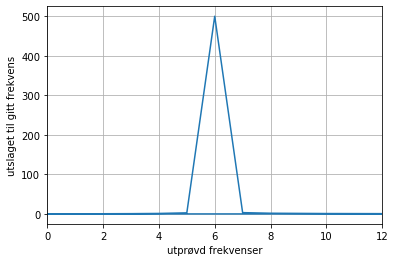

In [3]:
#Vi begynner med å lage et eget array med alle signal punkter som vi kan sample:
data = np.zeros(len(t))
for i in range(len(t)):
    data[i] = sinus(t[i], 6)

#Og nå implementerer vi fourier transform:
dt = T/N
def fourier(data):
    data_fourier = np.fft.fft(data)
    freq = np.fft.fftfreq(N, dt) #Med dette lager vi bare et frekvens domen


    plt.plot(freq, abs(data_fourier)) #ved fourier bruker man komplekse tall, derfor finner vi bare abs. verdi av de
    plt.xlabel("utprøvd frekvenser")
    plt.ylabel("utslaget til gitt frekvens")
    plt.xlim(xmin=0, xmax=12)
    plt.grid(True)
    plt.show()
fourier(data)


Vi ser at utslaget er på 6Hz, dette må stemme siden vi har generert et signal på forhond som er på 6Hz, vi har derfor vist at fourier transform funker!

Etter at vi finner observert frekvens, ønsker vi å bruke det til å finne kildets hastighets verdi.

In [4]:
def vel(f_o, f_k):
    c = 100
    return abs(c * ((f_k/f_o) - 1))

print(vel(6, 5))

16.666666666666664


Resultatene sier at kildet beveger seg med ca 16.6 m/s! Vi ser at dette funker fint når kildet beveger seg med konstant hastighet, men hva ville skje hvis kildet hadde plutselig akselerert?! Hva hvis observatøren får inn et slik signal:

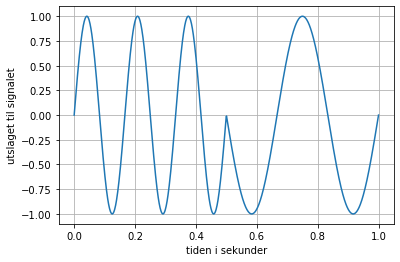

In [5]:
data1 = np.zeros(len(t))
for i in range(len(t)):
    if t[i] < 0.5:
        data[i] = sinus(t[i], 6)
    else:
        data[i] = sinus(t[i], 3)

plt.plot(t,data)
plt.xlabel("tiden i sekunder")
plt.ylabel("utslaget til signalet")
plt.grid(True)
plt.show()
    

Her ser vi at frekvensen plutselig mynker! Hva ser våres fourier transform?


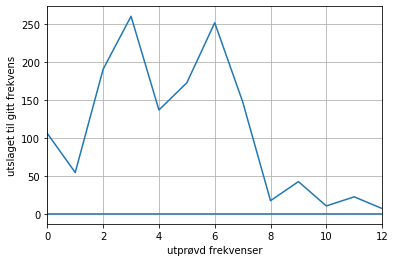

In [6]:

fourier(data)


Her ser vi at vi har målt to frekvenser, frekvens på 3Hz og frekvens op 6Hz. Hva blir hastigheten?

In [7]:
print(f"vel_1: {vel(3,5)}, vel_2 = {vel(6,5)}")

vel_1: 66.66666666666667, vel_2 = 16.666666666666664


Her ser vi at under observasjonen har kilde hatt to forskjellige hastigheter, en på ca. 66.6m/s og en på ca 16.6 m/s. Her møter vi et begrensning av furier transform, vi kan finne ut alle frekvenser og dermed alle hastigheter, men vi vet ikke når disse frekvensene har innslått, og dermed vet vi ikke om kilde har akselerert eller deakselerert relativt til oss. 

For å kunne finne ut når visse frekvenser innslåt i hvilke tidspunker, tar vi i bruk noe som heter wavelet-transform. Med wavelet transform, lager vi et wavelet med et viss bredde. Deretter velger vi et tilfeldig frekvens til denne waveletten, og lar den "scanne" seg gjennom hele signalet, vi registrerer da utslag i visse tider når wavelets frekvens er identisk til signalets frekvens. Etter at waveletten har scannet seg gjennom, endrer vi frekvenser til wavelet og gjør det samme. Gif'en nede illustrerer denne prossesen meget godt

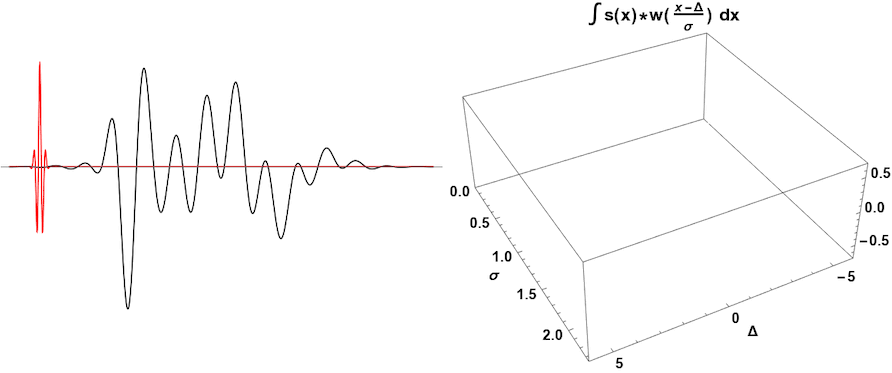

Dermed ved å lage to wavelets, en med frekvens på 3Hz, og annen med 8Hz, kan vi la dem scanne seg gjennom signalet of identifisere i hvilke tidspunker visse frekvenser gir utslag. Før vi skriver kode for dette, må vi innføre samplingsfrekvens. Samplingsfrekvens handler om hvor godt vi tilpasser signal inn i vår samplingen. Når vi får inn et digital signal, pleier vi å sette "punkter" der hvor signalet har verdier. Jo flere slike punkter det er, desto mer presis vi representerer signalet i vårt digital samplingen. Man kan tenke seg som om man ønsker å tegne et sirkel med punkter, og sette rette streker mellom disse punktene. Vi får meget unøyaktig sirkel ved å ha for eksempel 4 punker, men med flere punker vil våres sirkel se mer og mer presis ut. Samplingsfrekvens forteller dermed hvor stor mellomrom det er mellom disse punktene vi setter på signalet. Nyquist regel sier at samplingsfrekvens må være dobbelt så stor som frekvensen til signalet. 

5000


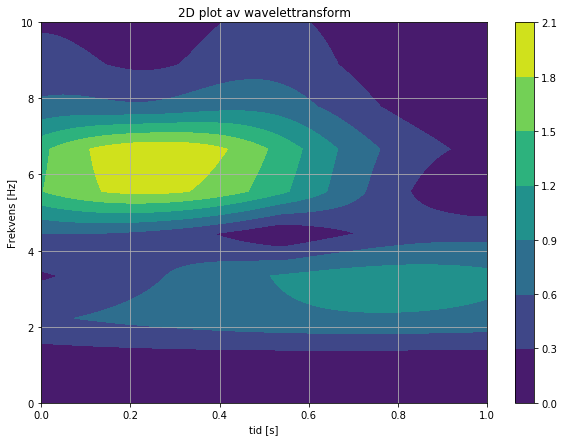

In [8]:
f_s = 5000 #samplingsfrekvens
"""
med samplingsfrekvens kan vi da finne antall punkter vi sampler med totalt hele signalet
med det igjen kan vi finne dt og utifra det bygger vi en ny tids array
"""
T = 1
N = f_s*T
dt = T/N
t = np.linspace(0,T,N)
print(N)

data = np.zeros(N)
for i in range(N):
    if t[i] < 1/2:
        data[i] = sinus(t[i], 6)
    else:
        data[i] = sinus(t[i], 3)



def wavelet_analyse(tmin, tmax, tsteps, fmin, fmax, fsteps):
        def wavelet(f_a, K, t_k, t_n):
            C = 0.798*2*np.pi*f_a/(f_s*K)
            eksp1 = -1j*2*np.pi*f_a*(t_n - t_k)
            eksp2 = -K**2
            eksp3 = (-2*np.pi*f_a**2)*((t_n - t_k)**2)/(2*K)**2
            return C*(np.exp(eksp1) - np.exp(eksp2))*np.exp(eksp3)

        t_ = np.linspace(tmin,tmax,tsteps)
        f_ = np.linspace(fmin,fmax,fsteps)
        T,F = np.meshgrid(t_,f_)
        K = 3

        sum = 0
        for i in range(N):
            sum = sum + np.conj(data[i]*(wavelet(F, K, T, t[i])))
        Z = abs(sum)
        plt.figure(figsize=([10,7]))
        plt.contourf(T,F,Z)
        plt.grid(True)
        plt.colorbar()
        plt.xlabel("tid [s]")
        plt.ylabel("Frekvens [Hz]")
        plt.title("2D plot av wavelettransform")
    
        plt.show()
wavelet_analyse(0, 1, 500, 0, 10, 10)

Vi får denne 2D plotten og ser at vi starter med frekvens 6, og deretter går den over til frekvens 3. Det betyr at kildet har mynket hastigheten!

La oss nå rydde koden vårt slik at den blir enklere å bruke og at alt blir mer ryddig.

In [57]:

class Analyse:
    def __init__(self, data, T):
        """
        Input: data array og total analysens tiden T
        Output:
        """
        self.T = T
        self.N = data.shape[0]
        self.f_s = self.N/self.T
        self.dt = 1/self.f_s
        
        print(f"Data med {self.N} samplingspunkter er mottat...")
        print(f"Samplingsfrekvens er på: {self.f_s}Hz, data som har frekvens mindre enn {self.f_s/2}Hz blir ikke registrert")
        print(f"Varighet av data er på {self.T} sekunder")
        
        self.t = np.linspace(0,self.T,self.N)
        self.x_n = data


    def sampled_signal(self):
        plt.figure(figsize=([15,5]))
        plt.plot(self.t, self.x_n)
        plt.grid(True)
        plt.xlabel("tid [s]")
        plt.ylabel("amplitude")
        plt.title("Plot of sampled signal")
        plt.show()

    def fourier_transform(self, xmin, xmax):
        self.x_k = np.fft.fft(self.x_n)
        self.freq = np.fft.fftfreq(self.N, self.dt)
        plt.figure(figsize=([15,5]))
        plt.plot(self.freq, abs(self.x_k))
        plt.grid(True)
        plt.xlabel("frekvens [f]")
        plt.ylabel("amplitude")
        plt.title("Plot of fourier transform")
        plt.xlim(xmin=xmin, xmax=xmax)
        plt.show()

    def wavelet_analyse(self,tmin, tmax, fmin, fmax, steps):
        self.steps = steps
        def wavelet(f_a, K, t_k, t_n):
            C = 0.798*2*np.pi*f_a/(self.f_s*K)
            eksp1 = -1j*2*np.pi*f_a*(t_n - t_k)
            eksp2 = -K**2
            eksp3 = (-2*np.pi*f_a**2)*((t_n - t_k)**2)/(2*K)**2
            return C*(np.exp(eksp1) - np.exp(eksp2))*np.exp(eksp3)

        self.t_ = np.linspace(tmin,tmax,self.steps)
        self.f_ = np.linspace(fmin,fmax,self.steps)
        T,F = np.meshgrid(self.t_,self.f_)
        K = 10 

        sum = 0
        for i in range(self.N):
            sum = sum + np.conj(self.x_n[i]*(wavelet(F, K, T, self.t[i])))
        self.Z = abs(sum)
        
        
        plt.figure(figsize=([10,7]))
        plt.contourf(T,F,self.Z)
        plt.grid(True)
        plt.colorbar()
        plt.xlabel("tid [s]")
        plt.ylabel("Frekvens [Hz]")
        plt.title("2D plot av wavelettransform")
        plt.show()
        
    def hastighet(self,f_o, c):
        frek = np.zeros(self.steps)
        tid = self.t_
        vel = np.zeros(self.steps)
        
        def v(f_k):
            return (c * ((f_k/f_o) - 1))
        
        for i in range(self.steps):
            index = np.where(self.Z == np.amax(self.Z[:,i]))
            monoindex = index[0]
            frek[i] = self.f_[monoindex]
            vel[i] = v(frek[i])
        plt.figure(figsize=([10,7]))    
        plt.plot(tid, vel)
        plt.plot(tid, vel, 'o')
        plt.grid(True)
        plt.xlabel("tid [s]")
        plt.ylabel("Hastighet [m/s]")
        plt.title("Hastighetsplot")
        plt.show()
        
            
        
        


        


Da har vi skrevet en klasse som tar i mot observert data, og finner hastighets kurven til kilden som sender ut lyset! La oss prøve den ut ved å analysere litt mer komplisert signal.

La oss tenke at kilden begynner fra ro, og begynner akselerer mot observatøren og plutselig brå bremser ned til ro igjen i løpet av 20 sekunder tidsperiode:


Data med 10000 samplingspunkter er mottat...
Samplingsfrekvens er på: 500.0Hz, data som har frekvens mindre enn 250.0Hz blir ikke registrert
Varighet av data er på 20 sekunder


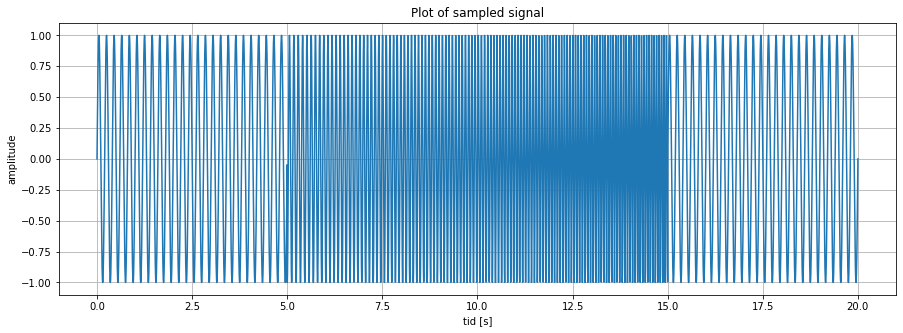

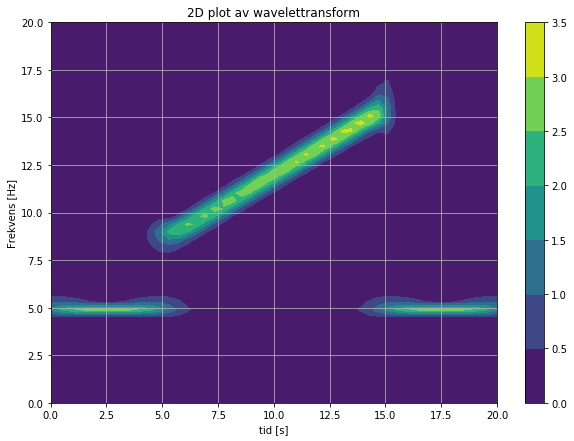

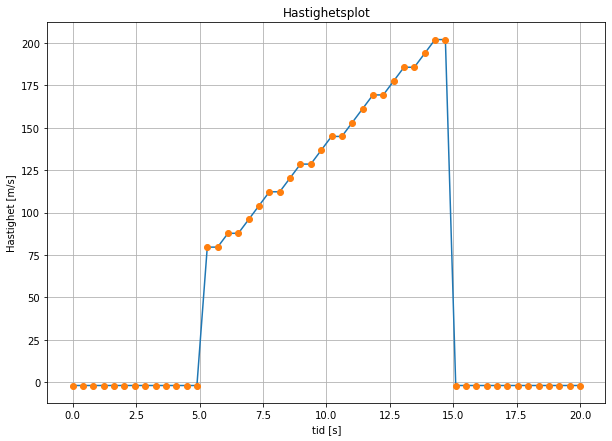

In [60]:
N = 10000
t = np.linspace(0,20,N)
data = np.zeros(N)
inc = 0
for i in range(N):
    if t[i] < 5:
        data[i] = sinus(t[i], 5)
    elif 5 < t[i] < 15:
        freq = 5 + inc
        data[i] = sinus(t[i], freq) 
    else:
        data[i] = sinus(t[i], 5)
    inc = inc + 0.0007
    

inst = Analyse(data, 20)
inst.sampled_signal()
inst.wavelet_analyse(0, 20, 0, 20, 50)
inst.hastighet(5,100)



Her ser vi at vi får imponerende gode resultater! Verdiene i dette systemet er urealistiske, dette er på grunn av at vi nøyer oss på å få dette scripte til å funke. Vi ser i tillegg at verdiene er ikke akkurat på de verdiene vi har modellert. For eksempel hastighet er ikke akkurat null når signalet er på 5Hz, for å få det mer nøye må vi rett og slett ofre mer datakapasitet og legge til flere timesteps mellom aller verdiene som simulasjonen prøver ut. 

Det siste plottet i vår tilfelle er viktigst, på plottet har vi hastighetsutvikling gitt i tid. Utifra det plottet kan vi da finne akselerasjon til kildet ved å finne veksten til hastigheten per tidsenhet. I det siste signalet kunne vi for eksempel tatt linær regresjon mellom $t = 5$sek og $t = 15$sek og finne stigningstallet til denne linære regresjonen. Stigningstallet ville være da akselerasjon. 

Vi kan i tillegg finne ut hvor strekning kildet har nådd ved å finne arealet under kurven, det kan vi oppnå ved å integrere over hele kurven! Dette er særlig viktig for våres problemstilling, siden vi ønsker å vite hvor vår satelitt befinner seg. Vi kan da for eksempel installere et system i satelitten som merker når kommunikasjon er brutt, når satelittens elektronikk ser det, kan den begynne å sende ut lysstråler, samtidig som at basene på jorda begynner å samle inn data. Slik kan basene begynne å "følge med" på hastighetsretningene for satelitten, og dermed vite hvor den er.


Vi skal nå se på et nytt system, et system som er mer komplisert en denne som vi har hatt nå. Vi skal nå flytte oss inn i 2D verden.

### System 2: Et kilde og to observatører i 2D